In [1]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9

In [2]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()  
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[5.90634734e-01 1.62685272e-02 1.84863587e-02 1.50039970e-02]
 [5.42469539e-03 5.76025053e-03 2.71070164e-03 3.18455413e-01]
 [2.21524681e-01 6.25114703e-03 4.15053182e-03 9.18944053e-03]
 [2.19323397e-03 1.01529816e-02 4.52398274e-04 1.03344641e-02]
 [5.95827132e-01 9.84365601e-03 4.72637137e-03 8.24863084e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.50389392e-03 9.63463106e-05 8.52355564e-05 8.10764034e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.60319888e-02 1.69421924e-02 5.83408663e-03 6.34914689e-01]
 [6.83540999e-04 2.70963994e-01 1.27759940e-02 9.89629663e-03]
 [3.45538927e-02 1.08281609e-03 1.20003182e-03 1.15966099e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.68870755e-02 3.30048531e-02 7.17329822e-01 1.31757385e-01]
 [2.37175559e-01 8.20558552e-01 2.50962955e-01 2.04887725e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

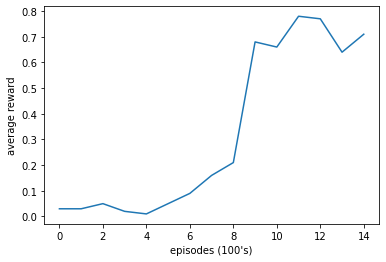

In [3]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()